In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
from src.data import clean_data
from src.models import train_model, predict_model
from src.visualization import visualize

In [13]:
# Cleaning and Splitting Train & Test
X, y = clean_data.importData('../src/data/Social_Network_Ads.csv')

In [19]:
print(X.shape)
print(y.shape)

(400, 2)
(400,)


In [20]:
X_train, X_test, y_train, y_test = clean_data.split_train_test(X, y)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 2)
(100, 2)
(300,)
(100,)


In [22]:
# Scaling
X_train, X_test = clean_data.scale(X_train, X_test)

In [23]:
X_train

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

In [25]:
# Training
classifier = train_model.train(X_train, y_train)

In [28]:
train_model.cross_val(X_train, y_train, classifier)

Accuracies mean is: 0.8833333333333334
Accuracies standard deviation is: 0.058214163988576595


In [29]:
# Prediction
y_pred = predict_model.predict(X_test, classifier)
predict_model.confusion_mat(y_test, y_pred)

[[63  5]
 [ 4 28]]


In [30]:
# Saving model and prediction
from sklearn.externals import joblib
filename = '../models/forest.sav'
joblib.dump(classifier, filename)

c:\users\nghet\documents\github\socialnetads\myenv\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['../models/forest.sav']

In [35]:
# write predicted result to csv file (Kaggle)
import csv
with open('../models/result.csv', 'w', newline='') as fh:
    writer = csv.writer(fh, delimiter=',')
    writer.writerow(["Id","Predicted"])
    for index, value in enumerate(y_pred):
        writer.writerow([index, value])
fh.close()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


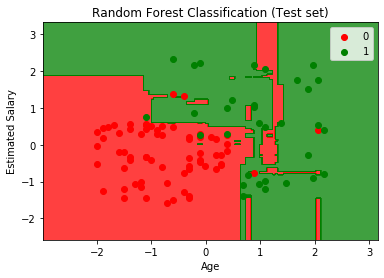

In [37]:
# Visualization
visualize.visualize(X_test, y_test, classifier)